# How to use Ising Model Package

In [1]:
include("IsingModule.jl");
using .IsingModelTest;

We first create the Ising model `struct` as below. We exhibit for 3 different cases: (i) general NN Ising model, (ii) mean-field NN Ising model, and (iii) fully connected Ising model, where the interaction strength $J$ is scaled by $N^2$ in the fully connected case. Note that $N^2$ is the number of agents in each simulation, and can be visualised on an $N\times N$ grid.

In [2]:
nmfIM = IsingModel(h=0.01, J=1.0, mf = 0, N=10);
mfIM = IsingModel(h=0.01,J=1.0, mf = 1,N=10);
fcIM = IsingModel(h=0.01,J=4.0, mf = 1, N=10, fully_connected = 1);

We can now create an ensemble of simulations for each case: we do $10^4$ simulations of each case where the initial condition is given by a randomly specified initial state where each spin can be $\pm 1$ with equal probability. Adding an argument `p0` to the `IsingModel` instances above allows for variation of this probability. Note that the automatic algorithm for each simulation is the `Glauber` algorithm, although alternatively one can choose `SSA` by specifying a `method` argument in the ensembles below. 

In [3]:
ensMF = Ensemble(e_size = 10000, IM=mfIM, tₘ=10^3, Δt = 1);
ensNMF = Ensemble(e_size = 10000, IM=nmfIM, tₘ=10^3, Δt = 1);
ensFC = Ensemble(e_size = 10000, IM=fcIM, tₘ=10^3, Δt = 1);

For each ensemble we can plot the central moments for the number of up spins at each time step.

In [4]:
using Plots;

In [5]:
cm2 = CentralMoments(ensFC,2);

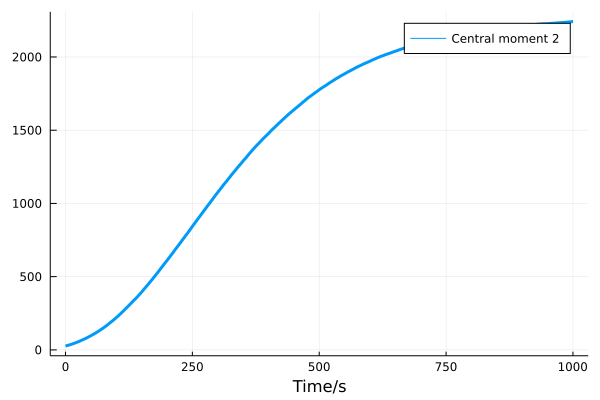

In [7]:
plot(cm2, label = join(["Central moment ", 2]), lw = 3)
xlabel!("Time/s")

We can also plot the probability distribution for each number of spins up at each time step.

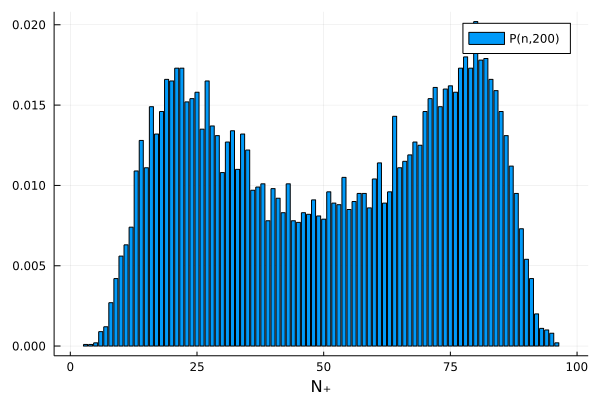

In [9]:
T = 200; # time step 100
pFC = EnsProbUpSpins(ensFC,T);
bar(pFC, label = join(["P(n,",T,")"]))
xlabel!("N₊")

In [12]:
sum(pFC[2]) # check probs sum to 1.

0.9999999999999998

We can plot the 2D grids at each time step for some time step $t_n$ in ensemble simulation $e_m$.

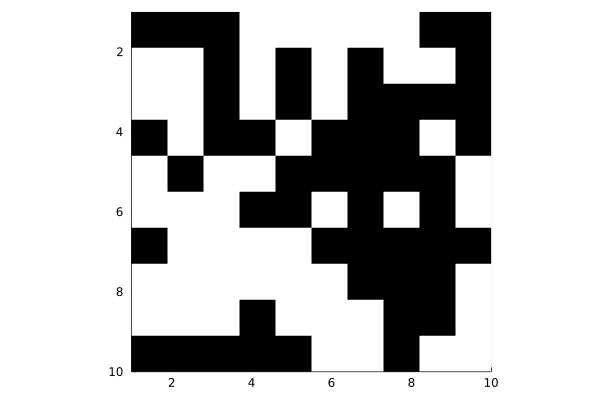

In [13]:
tₙ=100; eₘ = 1; 
Plot2D(tₙ,eₘ,ensFC)

Finally, one can make and save a GIF of the time evolution of a single simulation from an ensemble.

┌ Info: Saved animation to 
│   fn = /home/s1402978/Desktop/Internship/Code/Ising-29-06/class-test.gif
└ @ Plots /home/s1402978/.julia/packages/Plots/XCJgc/src/animation.jl:104


Plots.AnimatedGif("/home/s1402978/Desktop/Internship/Code/Ising-29-06/class-test.gif")
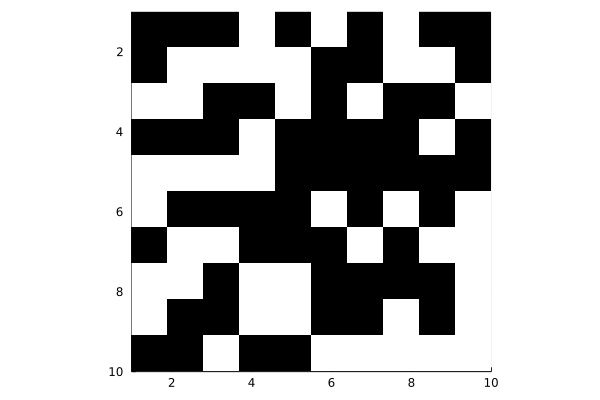

In [14]:
Gif2D(eₘ,ensFC,"class-test")